<a href="https://colab.research.google.com/github/ottersonjustin/MSBA--Analytics-Programming/blob/main/Otterson_Justin_Sprint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Dataset


In [ ]:
import pandas as pd
df= pd.read_csv("https://raw.githubusercontent.com/torero619/biostats549/main/Data/4_1%20and%204_2.csv")


In [ ]:
df.head()

,ID,Sex,Sex1,Age,LOS,DRG,Charges,Medicare,Diag,ICD-9
0,1,F,1,46,4,294,"$2,426.48","$2,003.62",2,0
1,2,F,1,87,8,139,"$6,815.61","$1,072.17",4,4
2,3,F,1,70,10,34,"$7,596.68","$4,096.98",6,0
3,4,M,0,72,5,140,"$6,450.77","$1,710.79",5,0
4,5,F,1,82,3,141,"$3,542.79","$1,914.90",3,7


<Axes: >

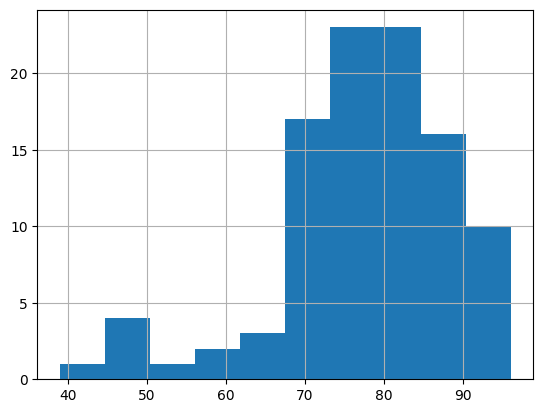

In [ ]:
df2 = df['Age']
df2.hist()


In [ ]:
# .cut
df.describe()

,ID,Sex1,Age,LOS,DRG,Diag,ICD-9
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.640000,77.700000,5.100000,189.770000,4.060000,2.180000
std,29.011492,0.482418,10.793283,3.346942,110.455426,1.942715,2.540103
min,1.000000,0.000000,39.000000,1.000000,14.000000,1.000000,0.000000
25%,25.750000,0.000000,73.000000,2.000000,125.750000,2.750000,0.000000
50%,50.500000,1.000000,78.000000,4.000000,143.000000,4.000000,0.000000
75%,75.250000,1.000000,85.000000,7.000000,271.250000,5.000000,4.000000
max,100.000000,1.000000,96.000000,16.000000,493.000000,9.000000,7.000000


In [ ]:
bins = [0,73,78,85,96]
labels = ['young', 'older', 'oldest', 'super old']
df['age_bin'] = pd.cut(df["Age"],bins,labels = labels)
df.head()


,ID,Sex,Sex1,Age,LOS,DRG,Charges,Medicare,Diag,ICD-9,age_bin
0,1,F,1,46,4,294,"$2,426.48","$2,003.62",2,0,young
1,2,F,1,87,8,139,"$6,815.61","$1,072.17",4,4,super old
2,3,F,1,70,10,34,"$7,596.68","$4,096.98",6,0,young
3,4,M,0,72,5,140,"$6,450.77","$1,710.79",5,0,young
4,5,F,1,82,3,141,"$3,542.79","$1,914.90",3,7,oldest


array([[<Axes: title={'center': 'young'}>,
        <Axes: title={'center': 'older'}>],
       [<Axes: title={'center': 'oldest'}>,
        <Axes: title={'center': 'super old'}>]], dtype=object)

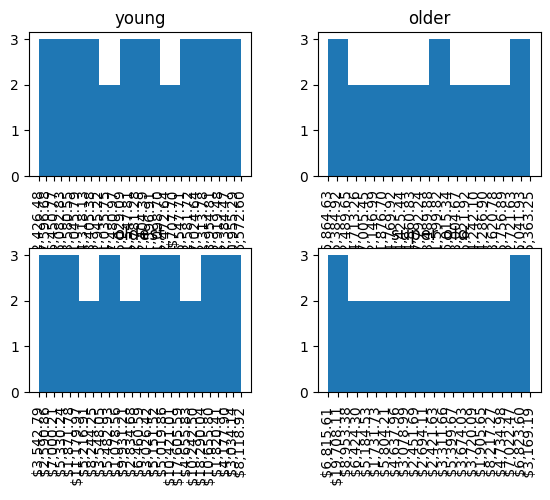

In [ ]:
df3 = df['age_bin']
df.hist(' Charges ', by= 'age_bin')

In [ ]:
desc_stats = df.groupby('age_bin')[' Charges '].describe()
desc_stats


,count,unique,top,freq
age_bin,,,,
young,28,28,"$2,426.48",1
older,23,23,"$6,864.63",1
oldest,27,27,"$3,542.79",1
super old,22,22,"$6,815.61",1


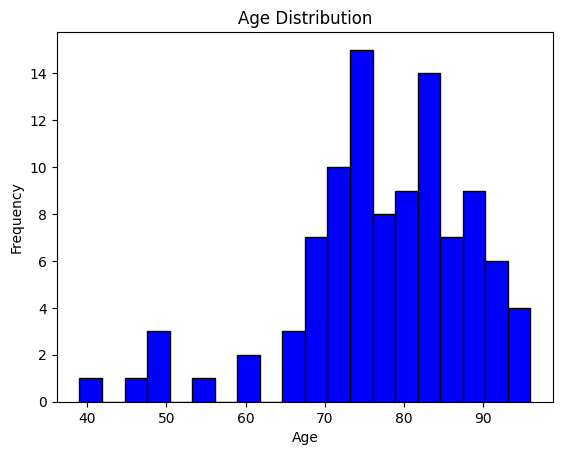

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=20, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['ChargesInt'] = (df[' Charges '].replace('[\$,)]','', regex=True ).replace( '[(]','-',regex=True ).astype(float))

In [ ]:
correlation = df[['Age', 'ChargesInt']].corr()
correlation



,Age,ChargesInt
Age,1.000000,0.111163
ChargesInt,0.111163,1.000000


# Movies Dataset

Import Dataset

In [ ]:
import pandas as pd
movies_df= pd.read_csv("https://raw.githubusercontent.com/torero619/MSBA502/main/Data/imdb_1000.csv")
movies_df.head

<bound method NDFrame.head of      star_rating                                            title  \
0            9.3                         The Shawshank Redemption   
1            9.2                                    The Godfather   
2            9.1                           The Godfather: Part II   
3            9.0                                  The Dark Knight   
4            8.9                                     Pulp Fiction   
..           ...                                              ...   
974          7.4                                          Tootsie   
975          7.4                      Back to the Future Part III   
976          7.4  Master and Commander: The Far Side of the World   
977          7.4                                      Poltergeist   
978          7.4                                      Wall Street   

    content_rating      genre  duration  \
0                R      Crime       142   
1                R      Crime       175   
2           

Data Cleaning

In [ ]:

# Safely clean the 'YEAR' column
if 'YEAR' in movies_df.columns and movies_df['YEAR'].dtype == 'O':  # Check if 'YEAR' column is present and is of object type
    movies_df['YEAR'] = movies_df['YEAR'].str.extract('(\d{4})')  # Extract the four-digit year
    movies_df['YEAR'] = movies_df['YEAR'].astype(float)  # Convert to numeric

# Clean the 'GENRE' column by removing unnecessary characters such as '\n'
if 'GENRE' in movies_df.columns:  # Check if 'GENRE' column is present
    movies_df['GENRE'] = movies_df['GENRE'].str.strip().str.replace('\n', '')

# Display the cleaned dataframe
movies_df.head()


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


Stretch Goal 1/ Statistics


In [ ]:
import pandas as pd
from collections import defaultdict

# Read the dataset
df = pd.read_csv("https://raw.githubusercontent.com/torero619/MSBA502/main/Data/imdb_1000.csv")

# Initialize a default dictionary to store genre counts
genre_counts = defaultdict(int)

# Loop through the genres in the dataset
for genres in df['genre']:
    # Check if the genre is not NaN
    if pd.notna(genres):
        # Remove newline characters, split the genres, and strip any whitespace
        for genre in genres.replace('\n', '').split(","):
            genre = genre.strip()
            # Increment the count for the genre
            genre_counts[genre] += 1

# Sort the genres by count in descending order and print
print(dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)))


{'Drama': 278, 'Comedy': 156, 'Action': 136, 'Crime': 124, 'Biography': 77, 'Adventure': 75, 'Animation': 62, 'Horror': 29, 'Mystery': 16, 'Western': 9, 'Sci-Fi': 5, 'Thriller': 5, 'Film-Noir': 3, 'Family': 2, 'History': 1, 'Fantasy': 1}


In [ ]:
# Get the columns
print(movies_df.columns)


Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')


Bin by duration

In [ ]:
# Define bin edges based on the minimum and maximum duration in the dataset
min_duration = movies_df['duration'].min()
max_duration = movies_df['duration'].max()

# Define bin edges and labels for categorizing movies into 'Short', 'Medium', 'Long'
bin_edges = [min_duration, 90, 120, max_duration]  # You can adjust these values based on your preference
bin_labels = ['Short', 'Medium', 'Long']

# Create a new column 'DURATION_CATEGORY' to store the binned duration categories
movies_df['DURATION_CATEGORY'] = pd.cut(movies_df['duration'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the first few rows of the dataframe with the new 'DURATION_CATEGORY' column and calculate descriptive statistics for each duration category
print(movies_df.head())
print(movies_df.groupby('DURATION_CATEGORY').describe())


   star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list DURATION_CATEGORY  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...              Long  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']              Long  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...              Long  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...              Long  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....              Long  
                  star_rating                                               \
                     

Statistics for Genre

In [ ]:
# Group by 'genre' and calculate descriptive statistics for each genre
genre_stats = movies_df.groupby('genre').describe()
print(genre_stats)


          star_rating                                                    \
                count      mean       std  min    25%   50%    75%  max   
genre                                                                     
Action          136.0  7.884559  0.333084  7.4  7.600  7.80  8.100  9.0   
Adventure        75.0  7.933333  0.361802  7.4  7.650  7.90  8.100  8.9   
Animation        62.0  7.914516  0.292444  7.4  7.700  7.90  8.100  8.6   
Biography        77.0  7.862338  0.310364  7.4  7.600  7.80  8.100  8.9   
Comedy          156.0  7.822436  0.304922  7.4  7.600  7.80  8.000  8.6   
Crime           124.0  7.916935  0.392143  7.4  7.600  7.80  8.100  9.3   
Drama           278.0  7.902518  0.328041  7.4  7.600  7.90  8.100  8.9   
Family            2.0  7.850000  0.070711  7.8  7.825  7.85  7.875  7.9   
Fantasy           1.0  7.700000       NaN  7.7  7.700  7.70  7.700  7.7   
Film-Noir         3.0  8.033333  0.305505  7.7  7.900  8.10  8.200  8.3   
History           1.0  8.

Statistics for Content Rating

In [ ]:
# Group by 'content_rating' and calculate descriptive statistics for each content rating
content_rating_stats = movies_df.groupby('content_rating').describe()
print(content_rating_stats)


               star_rating                                                  \
                     count      mean       std  min    25%  50%   75%  max   
content_rating                                                               
APPROVED              47.0  8.027660  0.307657  7.5  7.800  8.1  8.20  8.7   
G                     32.0  7.990625  0.303059  7.4  7.775  8.0  8.20  8.6   
GP                     3.0  7.933333  0.208167  7.7  7.850  8.0  8.05  8.1   
NC-17                  7.0  7.614286  0.157359  7.4  7.550  7.6  7.65  7.9   
NOT RATED             65.0  8.123077  0.284368  7.5  7.900  8.2  8.30  8.9   
PASSED                 7.0  8.157143  0.287849  7.7  8.050  8.1  8.30  8.6   
PG                   123.0  7.879675  0.325667  7.4  7.600  7.8  8.10  8.8   
PG-13                189.0  7.828571  0.325884  7.4  7.600  7.8  8.00  9.0   
R                    460.0  7.854783  0.340061  7.4  7.600  7.8  8.10  9.3   
TV-MA                  1.0  8.100000       NaN  8.1  8.100  8.1 

Stretch Goal 2: Histogram for Star_Rating

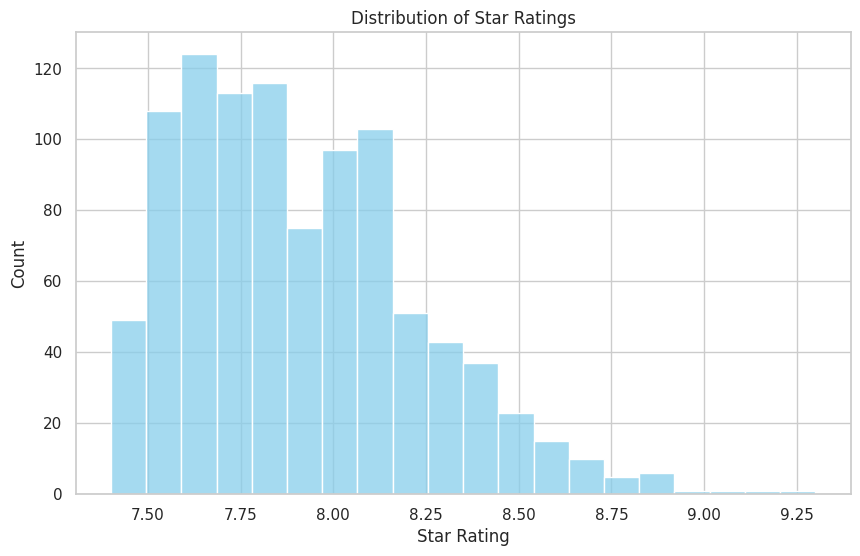

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(movies_df['star_rating'], kde=False, bins=20, color='skyblue')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


Histogram for Duration

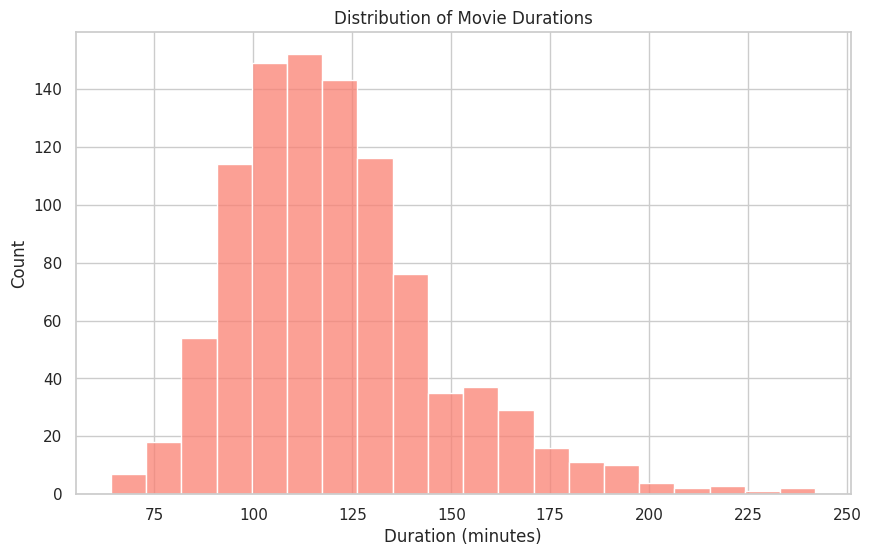

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(movies_df['duration'], kde=False, bins=20, color='salmon')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


Histogram for Genre

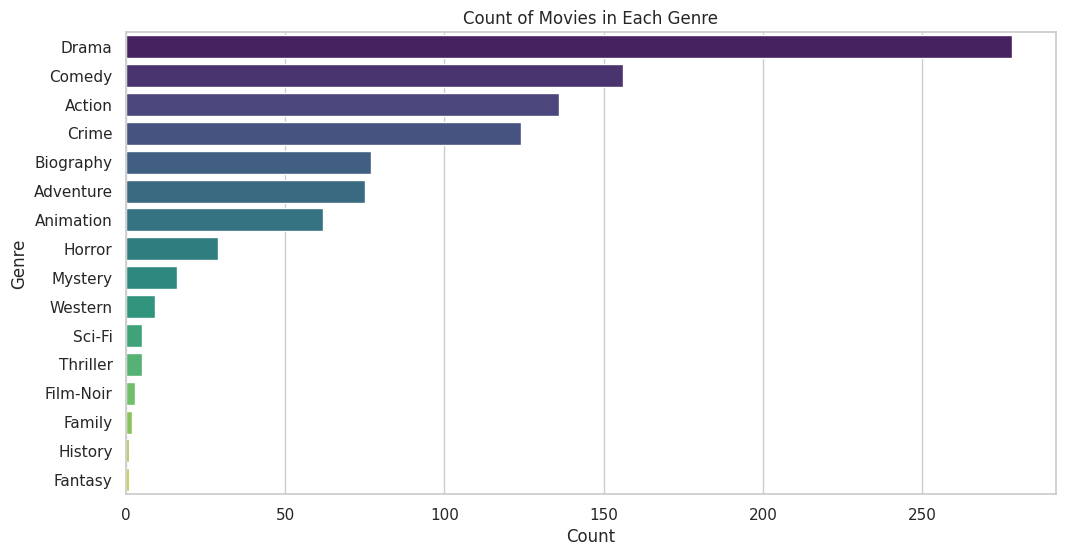

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=movies_df, y='genre', order=movies_df['genre'].value_counts().index, palette='viridis')
plt.title('Count of Movies in Each Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# Superstore Dataset

In [ ]:
#importing libiraries

import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#puts graphic directly under code

#import data
from google.colab import files
upload = files.upload()

Saving Sample - Superstore.xls to Sample - Superstore (1).xls


In [ ]:
# Load the dataset
data = pd.read_csv('/mnt/data/Provisional_COVID-19_Deaths_by_Sex_and_Age_20231011.csv')

# Display the first few rows of the dataset
data.head()


NameError: ignored

In [ ]:
# display the data
df = pd.read_excel(io.BytesIO(upload['Sample - Superstore (1).xls']))
df.head

<bound method NDFrame.head of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2019-152156 2019-11-08 2019-11-11    Second Class   
1          2  CA-2019-152156 2019-11-08 2019-11-11    Second Class   
2          3  CA-2019-138688 2019-06-12 2019-06-16    Second Class   
3          4  US-2018-108966 2018-10-11 2018-10-18  Standard Class   
4          5  US-2018-108966 2018-10-11 2018-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2017-110422 2017-01-21 2017-01-23    Second Class   
9990    9991  CA-2020-121258 2020-02-26 2020-03-03  Standard Class   
9991    9992  CA-2020-121258 2020-02-26 2020-03-03  Standard Class   
9992    9993  CA-2020-121258 2020-02-26 2020-03-03  Standard Class   
9993    9994  CA-2020-119914 2020-05-04 2020-05-09    Second Class   

     Customer ID     Customer Name    Segment Country/Region             City  \
0       CG-12520       Claire Gute   Consumer  U

Deliverable 1: Bin the Sales Column

In [ ]:
import numpy as np

# Define the bin edges using numpy's linspace
bin_edges = np.linspace(start=min_sales, stop=max_sales, num=num_bins+1, endpoint=True)

# Create bins for the 'Sales' column
df['Sales_Bin'] = pd.cut(df['Sales'], bins=bin_edges, include_lowest=True)

# Display the first few rows of the dataset with the new 'Sales_Bin' column
df[['Sales', 'Sales_Bin']].head()

,Sales,Sales_Bin
0,261.9600,"(0.443, 4528.051]"
1,731.9400,"(0.443, 4528.051]"
2,14.6200,"(0.443, 4528.051]"
3,957.5775,"(0.443, 4528.051]"
4,22.3680,"(0.443, 4528.051]"


Deliverable 2: Descriptive Statistics of Subsetted Groups

In [ ]:
# Group by 'Sales_Bin' and calculate descriptive statistics for each group
descriptive_stats = df.groupby('Sales_Bin').describe(include='all')

# For each bin, display the count, mean, and standard deviation of the numerical columns
descriptive_stats_numeric = descriptive_stats[[col for col in descriptive_stats.columns if 'mean' in col or 'std' in col or 'count' in col]]
descriptive_stats_numeric.transpose()


<ipython-input-73-e232de9e2f66>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descriptive_stats = df.groupby('Sales_Bin').describe(include='all')
<ipython-input-73-e232de9e2f66>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descriptive_stats = df.groupby('Sales_Bin').describe(include='all')
<ipython-input-73-e232de9e2f66>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descriptive_

Sales_Bin      (0.443, 4528.051] (4528.051, 9055.658] (9055.658, 13583.266]  \
Row ID   count            9967.0                 19.0                   5.0   
         mean        4997.271596          5015.684211                4846.4   
         std         2885.224434          3150.837685           2441.135863   
Order ID count              9967                   19                     5   
         mean                NaN                  NaN                   NaN   
...                          ...                  ...                   ...   
Discount mean           0.156345             0.110526                  0.04   
         std            0.206536             0.166315              0.089443   
Profit   count            9967.0                 19.0                   5.0   
         mean          23.081482          1164.853063            4180.56034   
         std          161.252338           1749.60315           1105.451567   

Sales_Bin      (13583.266, 18110.873] (18110.873, 22638.48]  
Row ID   count                    2.0                   1.0  
         mean                  7490.5                2698.0  
         std               938.330699                   NaN  
Order ID count                      2                     1  
         mean                     NaN                   NaN  
...                               ...                   ...  
Discount mean                     0.0                   0.5  
         std                      0.0                   NaN  
Profit   count                    2.0                   1.0  
         mean               7559.9784            -1811.0784  
         std              1187.935998                   NaN  

[63 rows x 5 columns]

**Insights**

-As the sales value increases, the average profit generally increases, but the variability in profit also increases.

-The highest sales bin has only one transaction and resulted in a loss, suggesting that higher sales do not necessarily equate to higher profits.

Deliverable 3- Exploratory Data Analysis (EDA) with Visualization for Bins

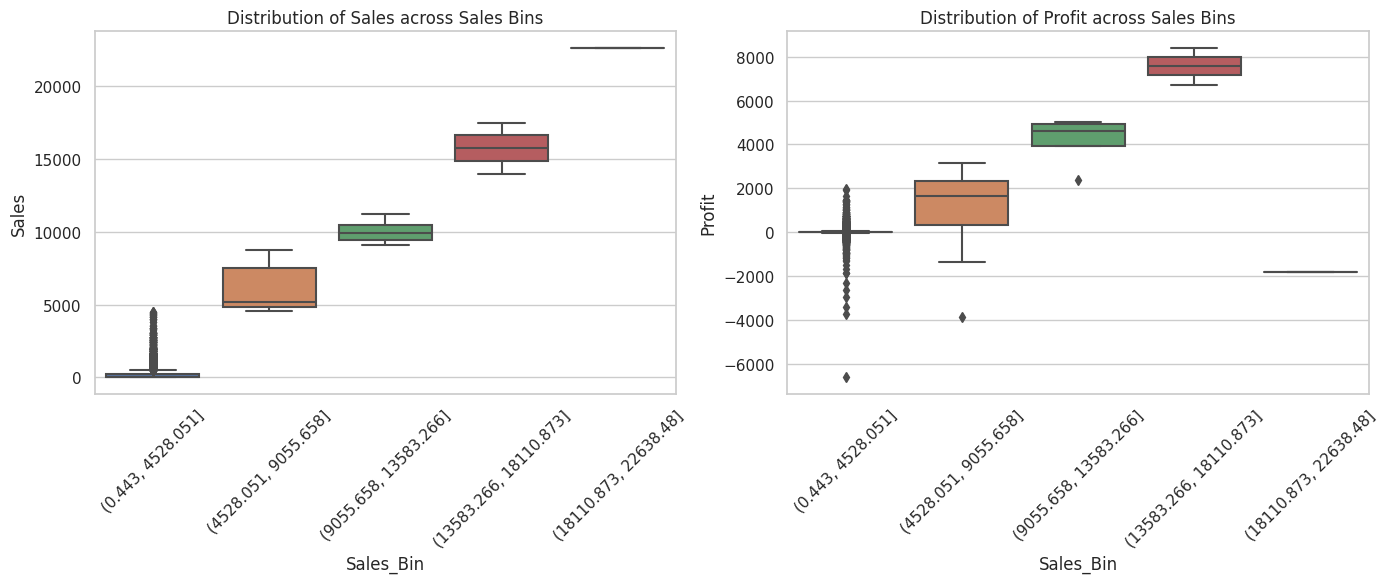

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(14, 6))

# Create a boxplot to visualize the distribution of Sales and Profit across different Sales Bins
plt.subplot(121)
sns.boxplot(x="Sales_Bin", y="Sales", data=df)
plt.title('Distribution of Sales across Sales Bins')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(122)
sns.boxplot(x="Sales_Bin", y="Profit", data=df)
plt.title('Distribution of Profit across Sales Bins')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**EDA Interpretation**

Distribution of Sales across Sales Bins:

The majority of the sales are concentrated in the first bin, with some outliers present in the higher sales range.
The higher sales bins (from the second bin onwards) have fewer data points but with higher sales values, as expected from the binning.
Distribution of Profit across Sales Bins:

There is a wide distribution of profit in the first sales bin, with both losses and gains represented.
Higher sales bins tend to have higher profits but with high variability.
Interestingly, the highest sales bin has a negative profit, indicating a loss.

Higher sales also bring higher variability in profits, and potentially losses, as observed in the highest sales bin.

.




Stretch Goals- Histograms!

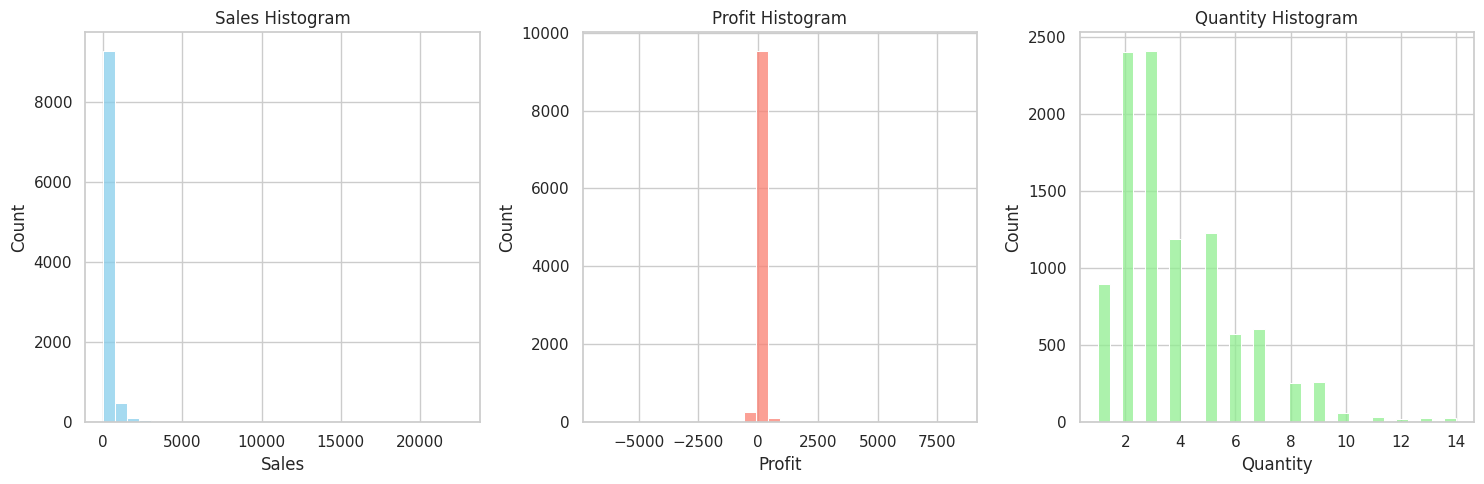

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Sales Histogram
plt.subplot(131)
sns.histplot(df['Sales'], kde=False, bins=30, color='skyblue')
plt.title('Sales Histogram')
plt.xlabel('Sales')
plt.ylabel('Count')

# Profit Histogram
plt.subplot(132)
sns.histplot(df['Profit'], kde=False, bins=30, color='salmon')
plt.title('Profit Histogram')
plt.xlabel('Profit')
plt.ylabel('Count')

# Quantity Histogram
plt.subplot(133)
sns.histplot(df['Quantity'], kde=False, bins=30, color='lightgreen')
plt.title('Quantity Histogram')
plt.xlabel('Quantity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# College Baskeball Dataset

In [ ]:
#From native library, import files
from google.colab import files
#Imports IO library, commmand that will be called later to load data into variable
import io
#Sets file we upload to variable 'uploaded'
uploaded = files.upload()

Saving CollegeBasketballPlayers2009-2021.csv to CollegeBasketballPlayers2009-2021.csv


In [ ]:
 # Imports basketball csv to variable
df_bball = pd.read_csv(io.BytesIO(uploaded['CollegeBasketballPlayers2009-2021.csv']))

<ipython-input-79-6af56520fddc>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bball = pd.read_csv(io.BytesIO(uploaded['CollegeBasketballPlayers2009-2021.csv']))


In [ ]:
# Returns dataset head
df_bball.head()

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


Deliverable 1- Bin the Data

In [ ]:
# Define the bins and labels
pts_bins = [0, 10, 20, 25, 31]  # Define your desired bin intervals
pts_labels = ['0-10', '11-20', '21-25', '25+']

# Create a new column 'Point_Group' based on the bins
df_bball['Point_Group'] = pd.cut(df_bball['pts'], bins=pts_bins, labels=pts_labels, right=False)

Deliverable 2 - Descriptive Stats Table for Subsetted Data

In [ ]:
 # Returns descriptive statistic tables grouped by subsetted data (pts_bins)
desc_stats_bball = df_bball.groupby('Point_Group')['team'].describe()
desc_stats_bball

,count,unique,top,freq
Point_Group,,,,
0-10,48197,362,Army,195
11-20,12426,362,Gonzaga,53
21-25,370,208,Evansville,7
25+,30,25,Oklahoma,2


Stretch Goal 2 - For Loop

In [ ]:
# For loop that returns each player and the team they play on
for index, row in df_bball.iterrows():
    player = row['player_name']
    point_group = row['team']
    print(f"{player} is on the {point_group} team.")

Streaming output truncated to the last 5000 lines.
Ahmid Bryant is on the Georgia St. team.
EJ Perry is on the Brown team.
Brendan Martin is on the Quinnipiac team.
Jamario Bell is on the Arkansas team.
Jon Jossell is on the Vanderbilt team.
Shaq Davis is on the South Carolina St. team.
Eddie Ionescu is on the Oregon team.
Daniel Giannosa is on the Portland St. team.
Delis Boggs is on the Gardner Webb team.
Trey Gross is on the Delaware St. team.
Gregory Cross is on the Towson team.
Mikal Dawson is on the Akron team.
Jaylon Williams is on the Louisiana Lafayette team.
Santiago Vescovi is on the Tennessee team.
Zach Pina is on the Georgia St. team.
Jemar Lincoln is on the Georgia Southern team.
Tahj-Malik Campbell is on the Morgan St. team.
Jordan Mains is on the Arizona team.
Christopher Sutherland is on the Florida team.
Jareed Scott is on the Prairie View A&M team.
Jaxon Woodward is on the Idaho team.
Damaree Hunter is on the Florida A&M team.
Dacari Taylor is on the Florida A&M team

# Hotel Bookings

In [ ]:
# Reads csv and assigns to variable "hotel"
hotel_df = pd.read_csv("https://raw.githubusercontent.com/torero619/MSBA502/main/Data/hotel_bookings.csv")

In [ ]:
hotel_df.head() # First 5 observations

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Stretch Goal 1 - Plotting

<Axes: >

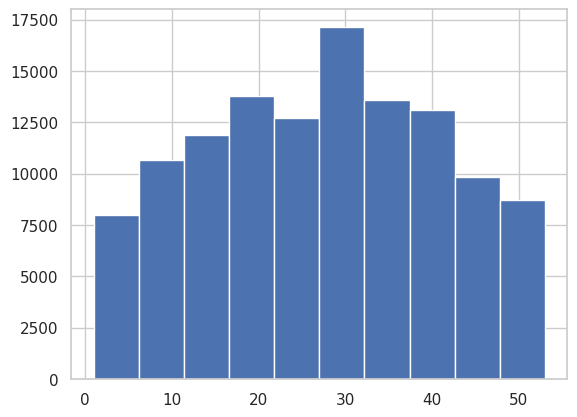

In [ ]:
# Histogram of Arrival Date Week Number
hotel_df['arrival_date_week_number'].hist()

Deliverable 1 Binning Data

In [ ]:
# Week Bins
week_bins = [0,10,20,30,40,55]
week_labels = ['0-10', '11-20', '21-30','30-40', '40+']
hotel_df['week_bins'] = pd.cut(hotel_df['arrival_date_week_number'],week_bins)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,week_bins
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,"(20, 30]"
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,"(20, 30]"
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,"(20, 30]"
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,"(20, 30]"
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,"(20, 30]"


Deliverable 2 - Descriptive Statistics

In [ ]:
# Group the data by the "arrival_week" column and calculate descriptive statistics
grouped = hotel_df.groupby('week_bins')
week_statistics = grouped.describe()

# Print the descriptive statistics for each arrival week bin
print(week_statistics['adults'])

# Interpretation: Throughout the year, the average number of adults staying in each room changes. During the middle of the year (week 20-40), there are more adults, on average, staying in each room.

             count      mean       std  min  25%  50%  75%   max
week_bins                                                       
(0, 10]    16557.0  1.754605  0.522966  0.0  1.0  2.0  2.0   4.0
(10, 20]   24845.0  1.844637  0.485098  0.0  2.0  2.0  2.0   4.0
(20, 30]   26940.0  1.902524  0.478811  0.0  2.0  2.0  2.0   4.0
(30, 40]   27034.0  1.947067  0.704033  0.0  2.0  2.0  2.0  50.0
(40, 55]   24014.0  1.784959  0.630091  0.0  2.0  2.0  2.0  55.0


Stretch Goal 2 - If Else

In [ ]:
# Apply the if-else statement to classify seasons
hotel_df['season'] = hotel_df['arrival_date_month'].apply(lambda x: 'Winter' if x in ['December', 'January', 'February']
                                                else 'Spring' if x in ['March', 'April', 'May']
                                                else 'Summer' if x in ['June', 'July', 'August']
                                                else 'Fall' if x in ['September', 'October', 'November']
                                                else 'Invalid Month')